# Introduction to K-means Clustering

In [1510]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

## Import Data

In [1511]:
directory = 'C:/Users/timot/Desktop/Data Science Projects/Larson Technologies DS Pitch/Business Intelligence - Customer Profiling/watson_marketing_customer_value_data.csv'

def data_import(directory):
    file_name = directory.split('/')[-1]
    print (f'Retrieving data from {file_name}...')
    df = pd.read_csv(directory)
    print ('...Data retrieved')
    return df
    
df = data_import(directory)


Retrieving data from watson_marketing_customer_value_data.csv...
...Data retrieved


## Preprocess Data

In [1512]:
# Clean Data
def data_clean(df, fill_type_num = 'median'):
    df_null = df.isnull().sum()/df.shape[0]
    print('Percentage of null entries (Before Fill)')
    print(df_null)

    print('\nCleaning data...')
    col_catagorical = []
    col_numerical = []
    for col in df.columns:
        if df[col].dtypes == 'O':
            col_catagorical.append(col)
            if df_null[col] > 0:
                print(f'Filling in missing catagorical data in {col} with mode of {col}...')
                df[col] = df[col].fillna(df[col].mode()[0])
            else:
                print(f'No missing entries for {col}')
        else:
            col_numerical.append(col)
            if df_null[col] > 0:
                if fill_type_num == 'median':
                    print(f'Filling in missing numerical data in {col} with median of {col}...')
                    df[col] = df[col].fillna(df[col].median()[0])
                else:
                    print(f'Filling in missing numerical data in {col} with mean of {col}...')
                    df[col] = df[col].fillna(df[col].mean()[0])
            else:
                print(f'No missing entries for {col}')
    
    print ('...Data cleaning complete\n')
    
    df_null_filled = df.isnull().sum()/df.shape[0]
    print('Percentage of null entries (After Fill)')
    print(df_null_filled)
    
    print(f'\nCatagorical Variables: {col_catagorical}')
    print(f'Numerical Variables: {col_numerical}')
    
    return df, col_catagorical, col_numerical

df, cat_col, num_col = data_clean(df, fill_type_num = 'median')

Percentage of null entries (Before Fill)
Customer                         0.0
State                            0.0
Customer Lifetime Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective To Date                0.0
EmploymentStatus                 0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Renew Offer Type                 0.0
Sales Channel                    0.0
Total Claim Amount               0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
dtype: float64

Cleaning data...
No missing entries for Customer
No mis

## Explore Data (EDA)

In [1513]:
list_to_remove_cat = {'Customer','Effective To Date'}
cat_col= list(set(cat_col).difference(set(list_to_remove_cat)))

list_to_remove_cat_kmeans= {'Customer', 'State', 'Response', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus','Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type'}
cat_col_kmeans= list(set(cat_col).difference(set(list_to_remove_cat_kmeans)))

#list_to_remove_num_kmeans= {'Months Since Policy Inception','Months Since Last Claim','Number of Policies','Number of Open Complaints'}
num_col_kmeans= list(set(num_col).difference(set(list_to_remove_num_kmeans)))

In [1514]:
def data_explore_cat(cat_col):

    for col in cat_col:
        print(f'Plotting bar chart for {col}...')
        cat_counts = df[col].value_counts()
        sns.set_style("darkgrid")
        plt.figure(figsize=(10,4))
        plt.title(f'{col}')
        sns.barplot(x=cat_counts.index, y=cat_counts.values, )
        plt.show()
    
#data_explore_cat(cat_col)       

## Model Evaluation

In [1515]:
# One-Hote Encode Catagorical Features
dummies = pd.get_dummies(df[cat_col], prefix=cat_col)
ohe_col = list(dummies.columns)
df = pd.concat([df, dummies], axis=1)
df.drop(cat_col_kmeans, axis=1, inplace=True)

In [1516]:
from sklearn import preprocessing

# Normalize Numerical Features
scaler = preprocessing.StandardScaler()
#scaler = preprocessing.MinMaxScaler()
num_norm = scaler.fit_transform(df[num_col])
num_norm = pd.DataFrame(num_norm, columns = num_col)
df.drop(num_col, axis=1, inplace=True)
df = pd.concat([df, num_norm], axis=1)

In [1517]:
df = df[num_col+ohe_col]

In [1518]:
corr = df.corr()

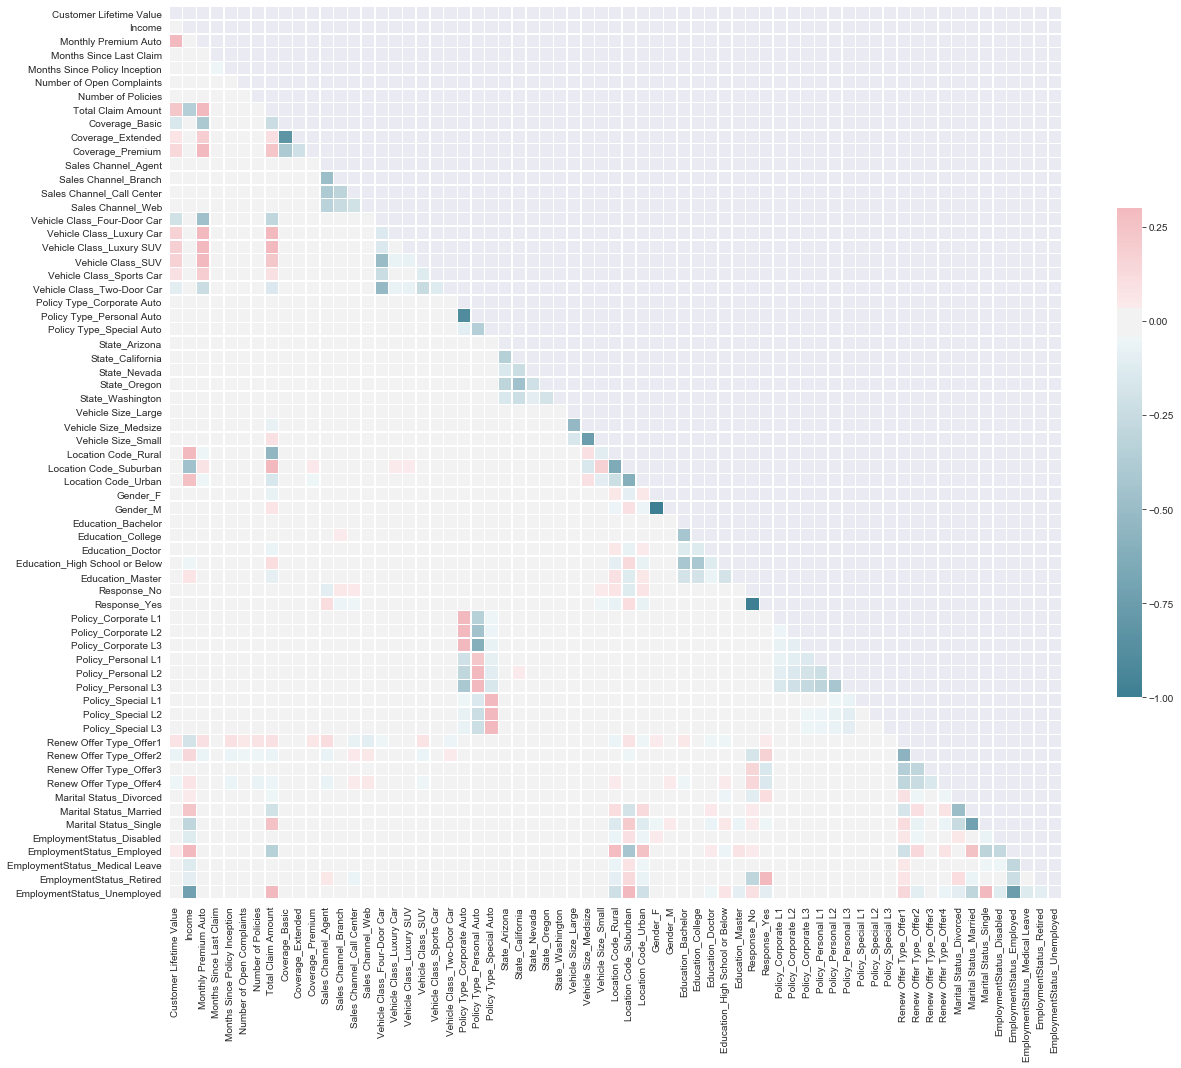

In [1519]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

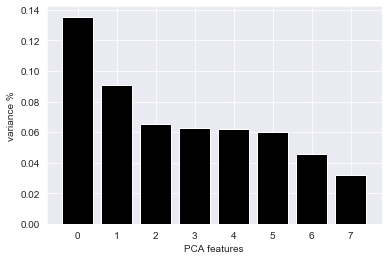

In [1520]:
# Create a PCA instance: pca
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(df)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 1')

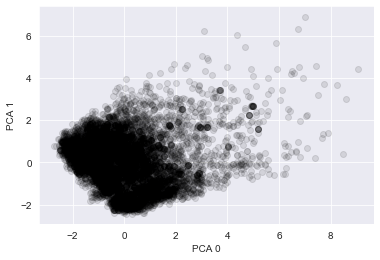

In [1521]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 0')
plt.ylabel('PCA 1')

Text(0, 0.5, 'PCA 2')

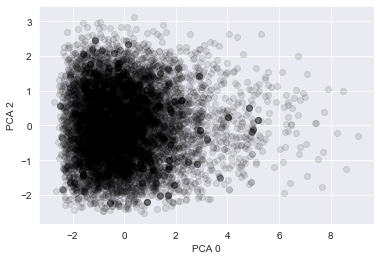

In [1522]:
plt.scatter(PCA_components[0], PCA_components[2], alpha=.1, color='black')
plt.xlabel('PCA 0')
plt.ylabel('PCA 2')

Text(0, 0.5, 'PCA 2')

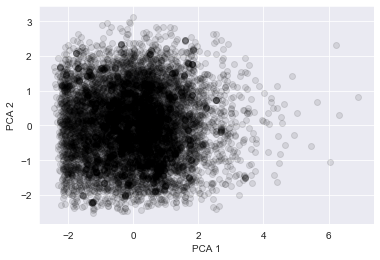

In [1523]:
plt.scatter(PCA_components[1], PCA_components[2], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

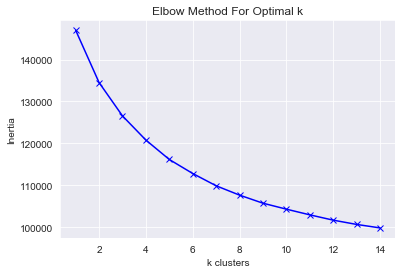

In [1524]:
Inertia = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Inertia.append(km.inertia_)

plt.plot(K, Inertia, 'bx-')
plt.xlabel('k clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [1525]:
clusters = 5
  
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(df) 
  
cluster_labels = kmeans.labels_

In [1526]:
kmeans.inertia_

116175.14017526599

In [1527]:
pca = PCA(3) 

pca_data = pd.DataFrame(pca.fit_transform(df), columns = ['X0', 'X1','X2']) 
pca_data['Class'] = cluster_labels                         
  

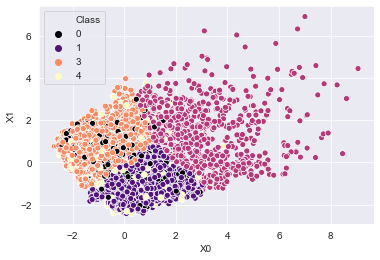

In [1528]:
import matplotlib.pyplot as plt 
ax = sns.scatterplot(x='X0', y='X1', hue = 'Class', data=pca_data, palette = 'magma')

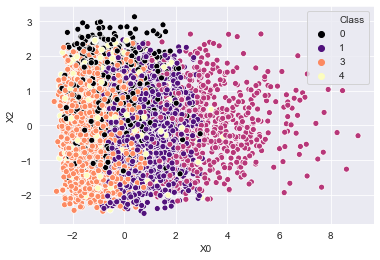

In [1529]:
import matplotlib.pyplot as plt 
ax = sns.scatterplot(x='X0', y='X2', hue = 'Class', data=pca_data, palette = 'magma')

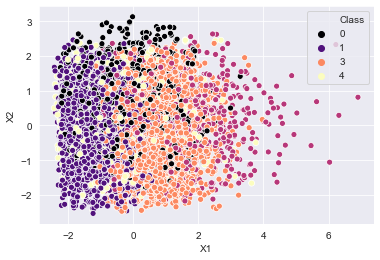

In [1530]:
import matplotlib.pyplot as plt 
ax = sns.scatterplot(x='X1', y='X2', hue = 'Class', data=pca_data, palette = 'magma')

In [1531]:
import plotly.express as px
fig = px.scatter_3d(pca_data, x='X0', y='X1', z='X2',
              color='Class')
fig.show()

In [1532]:
df['Cluster'] = cluster_labels

In [1533]:
df['Cluster'].value_counts()/df.shape[0]

3    0.382308
1    0.293628
0    0.155573
2    0.091964
4    0.076527
Name: Cluster, dtype: float64

In [1534]:
def data_explore_cat(cat_col):

    for col in cat_col:
        print(f'Plotting bar chart for {col}...')
        cat_percent = df_final[col].value_counts()/df_final.shape[0]
        sns.set_style("darkgrid")
        plt.figure(figsize=(10,4))
        plt.title(f'{col}')
        ax = sns.countplot(x="Cluster", hue=col, data=df_final)
        plt.show()
    
#data_explore_cat(cat_col)   

In [1535]:
def data_explore_num(num_col):

    for col in num_col:
        print(f'Plotting bar plot for {col}...')
        sns.set_style("darkgrid")
        plt.figure(figsize=(10,4))
        plt.title(f'{col}')
        ax = sns.barplot(x="Cluster", y=col, data=df_final)
        plt.show()
    
#data_explore_num(num_col) 

In [1536]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = df.columns
df_scaled = pd.DataFrame(scaler.fit_transform(df),columns = features)
df_scaled['Cluster'] = cluster_labels
df_mean = df_scaled.groupby('Cluster').mean()
df_median = df_scaled.groupby('Cluster').median()
df_std = df_scaled.groupby('Cluster').std()

In [1537]:
df_mean.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Coverage_Basic,Coverage_Extended,...,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.057653,0.389747,0.102284,0.432372,0.465528,0.037157,0.801636,0.129545,0.643913,0.289233,...,0.162562,0.087262,0.130190,0.648135,0.221675,0.042928,0.681210,0.054891,0.027445,0.193526
1,0.058513,0.088238,0.109385,0.435123,0.487764,0.032960,0.133016,0.178393,0.622670,0.304251,...,0.139821,0.094333,0.152125,0.409023,0.438852,0.088367,0.124907,0.099553,0.077554,0.609620
2,0.211499,0.303654,0.445173,0.441088,0.493771,0.054048,0.220982,0.327076,0.344048,0.372619,...,0.164286,0.095238,0.151190,0.500000,0.348810,0.058333,0.573810,0.035714,0.011905,0.320238
3,0.065156,0.602037,0.101274,0.425487,0.488933,0.025487,0.116015,0.098271,0.649198,0.278923,...,0.166380,0.139175,0.152348,0.701890,0.145762,0.007446,0.982818,0.007732,0.002005,0.000000
4,0.058649,0.418329,0.107900,0.432291,0.490340,0.610300,0.226395,0.128355,0.610873,0.326180,...,0.153076,0.115880,0.167382,0.585122,0.247496,0.045780,0.688126,0.042918,0.025751,0.197425


In [1538]:
df_median.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Coverage_Basic,Coverage_Extended,...,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.049802,0.356438,0.067511,0.4,0.454545,0.0,0.750,0.121080,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.038003,0.000000,0.088608,0.4,0.484848,0.0,0.125,0.169996,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.161635,0.273412,0.438819,0.4,0.494949,0.0,0.125,0.312748,0.0,0.0,...,0.0,0.0,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0
3,0.042170,0.602104,0.054852,0.4,0.484848,0.0,0.125,0.101425,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.039407,0.397255,0.071730,0.4,0.494949,0.6,0.125,0.117762,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [1539]:
df_std.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Coverage_Basic,Coverage_Extended,...,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.020695,0.283853,0.089467,0.286532,0.278153,0.093591,0.161233,0.067595,0.479010,0.453566,...,0.369095,0.282319,0.336631,0.477720,0.415520,0.202765,0.466171,0.227847,0.163435,0.395200
1,0.058209,0.118985,0.088727,0.286865,0.280921,0.085951,0.163253,0.070116,0.484809,0.460175,...,0.346866,0.292345,0.359209,0.491745,0.496339,0.283881,0.330675,0.299458,0.267518,0.487927
2,0.151500,0.271280,0.199961,0.296472,0.274369,0.134892,0.255953,0.145130,0.475340,0.483790,...,0.370755,0.293718,0.358448,0.500298,0.476878,0.234512,0.494817,0.185687,0.108522,0.466846
3,0.068080,0.213895,0.093706,0.286212,0.284310,0.067724,0.137286,0.059413,0.477289,0.448534,...,0.372475,0.346179,0.359410,0.457494,0.352918,0.085978,0.129968,0.087604,0.044734,0.000000
4,0.060642,0.300410,0.101965,0.291600,0.288730,0.182649,0.276573,0.072309,0.487901,0.469150,...,0.360318,0.320310,0.373584,0.493054,0.431867,0.209157,0.463590,0.202818,0.158505,0.398341


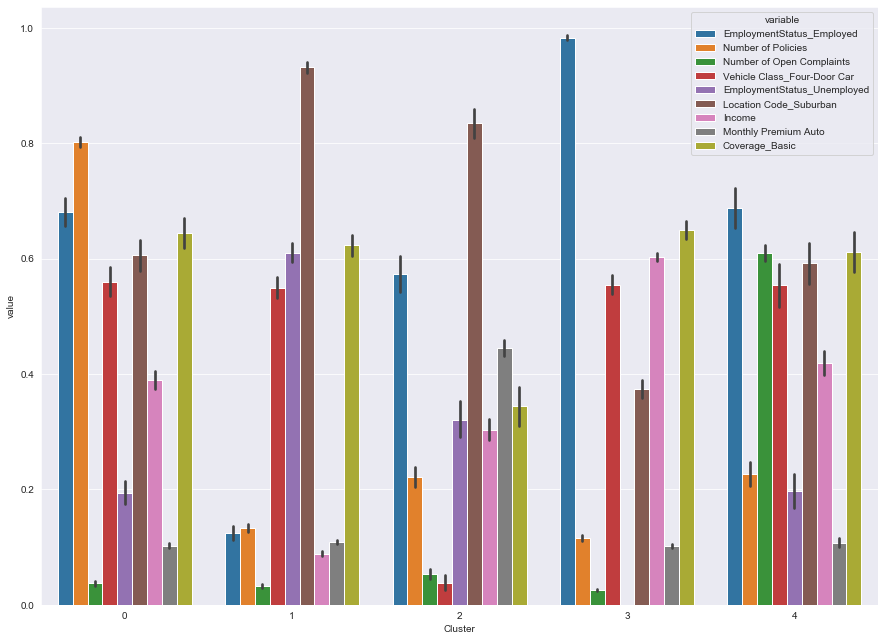

In [1540]:
results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
selected_columns = list(results.sort_values(
        'Var', ascending=False,
    ).head(9).Variable.values) + ['Cluster']
tidy = df_scaled[selected_columns].melt(id_vars='Cluster')
fig, ax = plt.subplots(figsize=(15,11))
sns.barplot(ax=ax, x='Cluster', y='value', hue='variable', data=tidy)

Cluster 0: 6%, SUV Owners, Low Income, Low Customer Lifetime Value
Cluster 1: 36%, Four Door Car Owners, Low Income, Low Customer Lifetime Value
Cluster 2: 4%, Luxury SUV/Car Owners, Higher Claims amount, Medium Customer Lifetime Value
Cluster 3: 20%
Cluster 4: 34%